In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('..\data\INFY_for_ml.csv', index_col=0)
data

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,Target
0,19778560,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644,1
1,20786048,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262,1
2,25256320,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353,1
3,20469632,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243,1
4,12953792,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977,1
...,...,...,...,...,...,...,...,...,...,...
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811,1
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381,-1
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501,-1
6158,3623321,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222,-8.473594,47.407003,1


The first step is to separate the features and the target variable.

In [4]:
features = data.drop(['Target','EMA200'], axis=1)
target = data['Target']
features

,Volume,EMA9,EMA20,EMA50,EMA100,EMA500,MACD,RSI
0,19778560,61.285038,65.265204,69.784212,71.959252,74.019727,-0.756295,37.852644
1,20786048,61.839990,65.150403,69.559725,71.802828,73.979967,-0.259355,44.944262
2,25256320,62.721762,65.255017,69.429887,71.692848,73.949104,0.237225,49.197353
3,20469632,63.647328,65.454501,69.348307,71.606843,73.922758,0.637554,51.237243
4,12953792,65.029413,65.940525,69.395736,71.586069,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1533.066662,-1.640194,50.438811
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1534.407668,-4.269369,50.862381
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1535.684191,-6.876149,47.745501
6158,3623321,1877.364046,1871.376780,1842.041094,1791.353025,1536.949222,-8.473594,47.407003


Now lets split the data into training sets and test sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
X_train

,Volume,EMA9,EMA20,EMA50,EMA100,EMA500,MACD,RSI
0,19778560,61.285038,65.265204,69.784212,71.959252,74.019727,-0.756295,37.852644
1,20786048,61.839990,65.150403,69.559725,71.802828,73.979967,-0.259355,44.944262
2,25256320,62.721762,65.255017,69.429887,71.692848,73.949104,0.237225,49.197353
3,20469632,63.647328,65.454501,69.348307,71.606843,73.922758,0.637554,51.237243
4,12953792,65.029413,65.940525,69.395736,71.586069,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...
4923,5368416,627.317151,621.102490,620.381151,626.487862,570.715637,1.472328,57.561846
4924,2112415,628.483945,622.249979,620.881935,626.619808,570.964880,1.318755,59.523534
4925,5658200,629.047898,623.112239,621.290632,626.712558,571.205754,0.991046,57.953263
4926,7882938,631.441016,624.817120,622.064077,626.995745,571.484427,1.306665,63.415968


Use RandomForestClassifer to train and predict the values.

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.49188311688311687

X_train and X_test has some very large values and some very small values, hence we will standardize the data for better results.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Use RandomForestClassifer to train and predict the values.

In [8]:
clf = RandomForestClassifier(n_estimators=50, random_state=42, max_features='log2', min_samples_split=10, criterion='log_loss')
clf.fit(X_train_scaled, y_train)
y_pred2 = clf.predict(X_test_scaled)

Now lets evaluate the models performance

In [9]:
clf.score(X_test_scaled, y_test)

0.474025974025974

Train the same model with shuffled data

In [15]:
np.random.seed(42)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(features, target, test_size=0.2) 
X_train_shuffled_scaled = scaler.fit_transform(X_train_shuffled)
X_test_shuffled_scaled = scaler.transform(X_test_shuffled)
clf2 = RandomForestClassifier()
clf2.fit(X_train_shuffled_scaled, y_train_shuffled)
y_pred3 = clf2.predict(X_test_shuffled_scaled)
clf2.score(X_test_shuffled_scaled, y_test_shuffled)

0.4943181818181818

### Evaluate the model using cross_val_score.

In [16]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(clf, features, target)

array([0.47077922, 0.4724026 , 0.48863636, 0.48701299, 0.51542208])

In [17]:
cross_val_score(clf2, features, target)

array([0.48051948, 0.47159091, 0.48944805, 0.48457792, 0.51461039])

### Evaluate the model using confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_shuffled, y_pred3)
pd.crosstab(y_test_shuffled, y_pred3, colnames=['Predicted'], rownames=['Actual'])

Predicted,-1,1
Actual,,
-1,281,325
1,298,328


### Display the confusion matrix using the Heatmap.

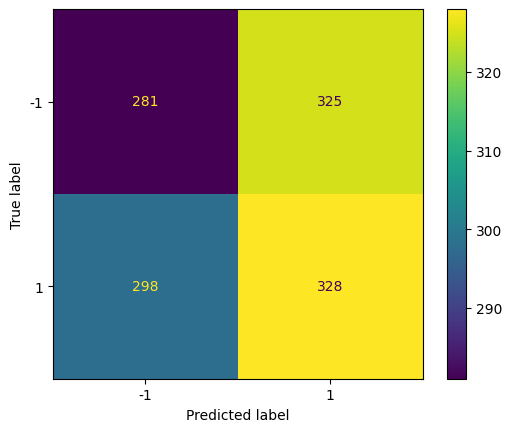

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf2, X=X_test_shuffled_scaled, y=y_test_shuffled.values);

### Use RandomizedSearchCv to tune hyperparameters

In [20]:
clf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"criterion":["gini", "ntropy", "log_loss"],
        "max_depth":[None, 2, 5, 7],
        "max_features":["sqrt", "log2", None],
        "min_samples_leaf":[1, 2, 3, 4],
        "min_samples_split":[2,3,4,5],
        "n_estimators":[10,50,100,200]}

In [44]:
clf_for_rsc = RandomForestClassifier(n_jobs=-1)
rs_clf = RandomizedSearchCV(estimator=clf_for_rsc, param_distributions=grid, n_iter=10, verbose=2, cv=5)

In [45]:
rs_clf.fit(X_train_shuffled_scaled, y_train_shuffled);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END criterion=ntropy, max_depth=2, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END criterion=ntropy, max_depth=2, max_features=None, min_samples_leaf=3, min_samples_split=5

c:\Users\ovase\Documents\Stock Market Analysis\stockvm\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ovase\Documents\Stock Market Analysis\stockvm\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ovase\Documents\Stock Market Analysis\stockvm\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\ovase\Documents\Stock Market Analysis\stockvm\lib\site-packages\sklearn\base.py

In [46]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 2,
 'criterion': 'log_loss'}

In [47]:
rs_y_preds = rs_clf.predict(X_test_shuffled_scaled)
rs_clf.score(X_test_shuffled_scaled,y_test_shuffled)

0.5113636363636364

### Tune Hyperparameters using GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

grid_2 = {"criterion":["log_loss"],
        "max_depth":[None, 2],
        "max_features":["log2", None],
        "min_samples_leaf":[1, 3],
        "min_samples_split":[2,3],
        "n_estimators":[50,100]}

clf_for_gs = RandomForestClassifier(n_jobs=-1)
gs_clf = GridSearchCV(estimator=clf_for_gs, param_grid=grid_2,cv=5,verbose=2)
gs_clf.fit(X_train_shuffled_scaled, y_train_shuffled)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_sam

,estimator,RandomForestC...ier(n_jobs=-1)
,param_grid,"{'criterion': ['log_loss'], 'max_depth': [None, 2], 'max_features': ['log2', None], 'min_samples_leaf': [1, 3], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [50]:
gs_clf.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [52]:
gs_clf.score(X_test_shuffled_scaled, y_test_shuffled)

0.5032467532467533

### Save the model.

In [53]:
import pickle

pickle.dump(gs_clf, open("..\models\Infosys_based_trained_model.pkl", "wb"))